In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## Datasets

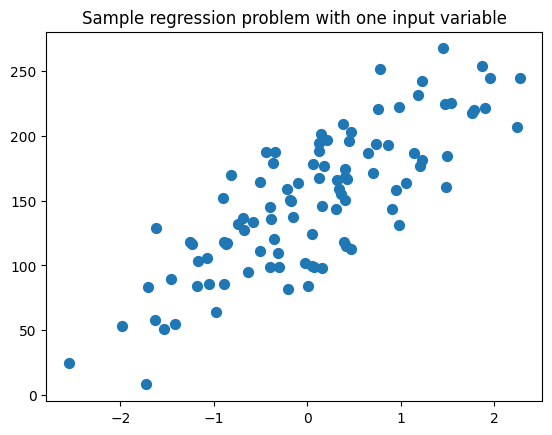

In [4]:
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_regression
cmap_bold = ListedColormap(['red', 'red', '#0000FF','#000000'])
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples=100, n_features=1, n_informative=1, bias=150, noise=30, random_state=0)
plt.scatter(X_R1, y_R1, marker='o', s=50)

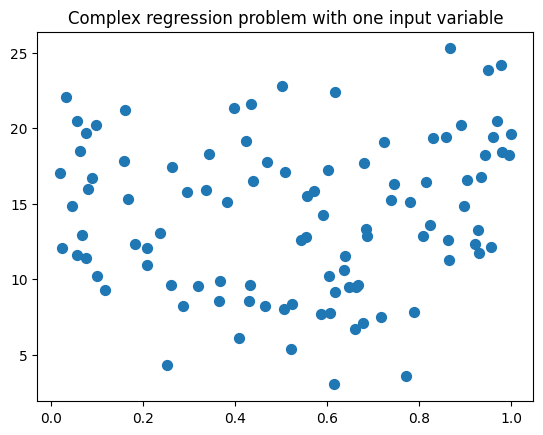

In [5]:
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 7, random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

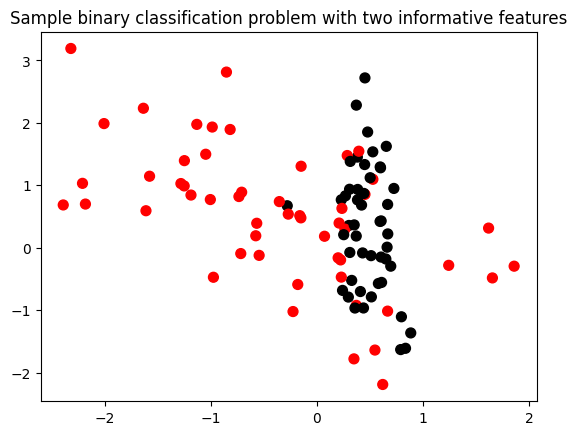

In [6]:
from sklearn.datasets import make_classification
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

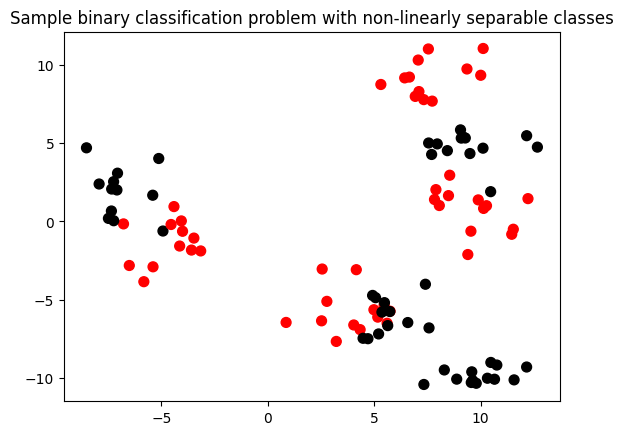

In [7]:
from sklearn.datasets import make_blobs
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

In [8]:
from adspy_shared_utilities import load_crime_dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y=True)
crime = load_crime_dataset()
(X_crime, y_crime) = load_crime_dataset()

In [9]:
X_crime
y_crime

0        41.02
1       127.56
2       218.59
3       306.64
5       442.95
         ...  
2210    545.75
2211    124.10
2212    353.83
2213    691.17
2214    918.89
Name: ViolentCrimesPerPop, Length: 1994, dtype: float64

## K-Nearest Neighbors: Classification and Regression

## 1. Classification 

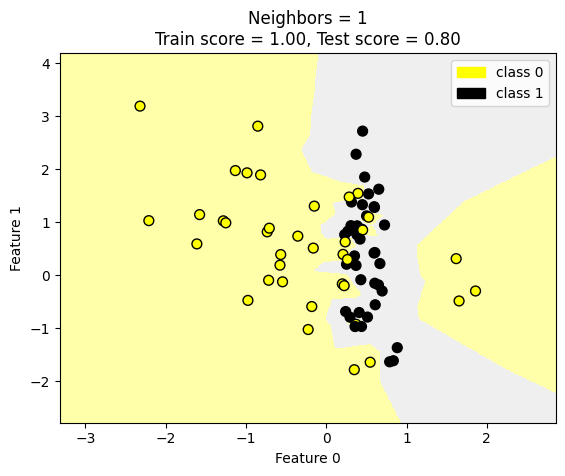

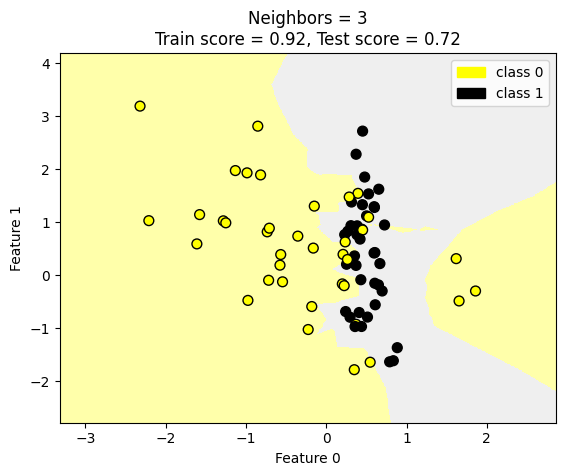

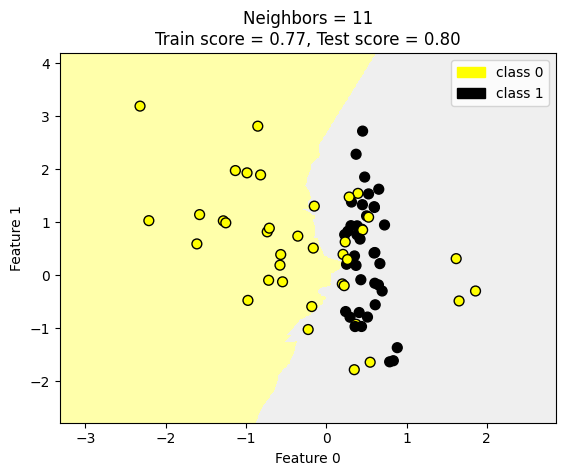

In [10]:
from adspy_shared_utilities import plot_two_class_knn
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)
plot_two_class_knn(X_train, y_train, 1, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 3, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 11, 'uniform', X_test, y_test)


## 2. Regression

## a. K Nearest Neighbors Regression:

In [11]:
from sklearn.neighbors import KNeighborsRegressor
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state=0)

knnreg = KNeighborsRegressor(n_neighbors=6).fit(X_train, y_train)
print(knnreg.predict(X_test))
print('R-squared test score: {:.3f}'.format(knnreg.score(X_test, y_test)))

[230.72152895 140.03893698 159.33934102 159.33934102  69.19150922
 171.11794875 136.480625   226.52451862 195.42058878  95.73289644
 186.7198019  131.6244304  226.52451862 140.03893698 152.26866635
 108.84453076 151.27391206 192.38716996 146.98726267 171.11794875
 230.72152895 195.42058878 127.90661204 124.83793333 136.480625  ]
R-squared test score: 0.523


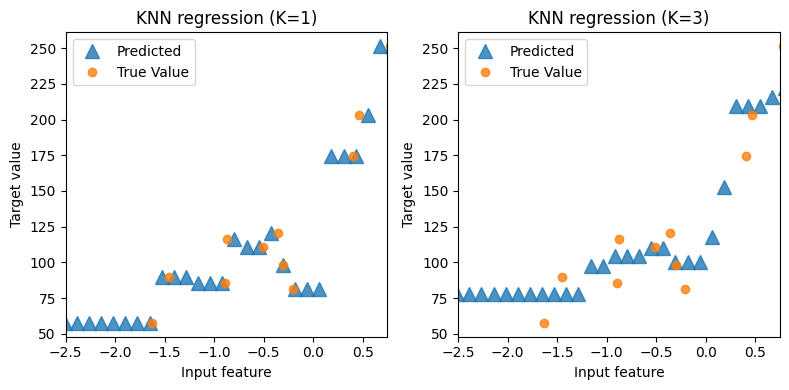

In [12]:
fig, subaxes = plt.subplots(1, 2, figsize=(8,4))
X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    thisaxis.set_xlim([-2.5, 0.75])
    thisaxis.plot(X_predict_input, y_predict_output, '^', markersize = 10,
                 label='Predicted', alpha=0.8)
    thisaxis.plot(X_train, y_train, 'o', label='True Value', alpha=0.8)
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN regression (K={})'.format(K))
    thisaxis.legend()
plt.tight_layout()

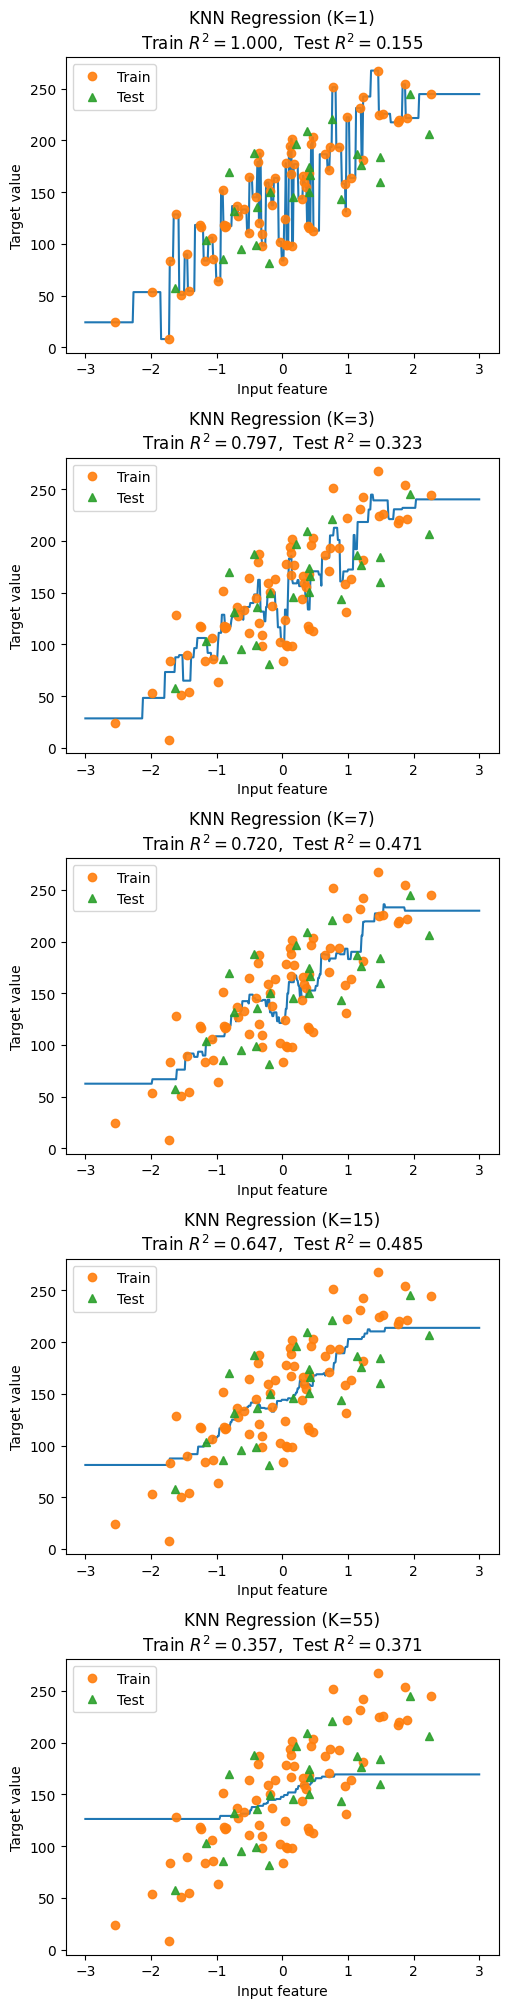

In [13]:
# plot k-NN regression on sample dataset for different values of K
fig, subaxes = plt.subplots(5, 1, figsize=(5,20))
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3, 7, 15, 55]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    thisaxis.plot(X_predict_input, y_predict_output)
    thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression (K={})\n\
Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

## b. Linear Regression:

In [14]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state=0)
linreg = LinearRegression().fit(X_train, y_train)
print("linear model coeff (w): {}".format(linreg.coef_))
print("linear model intercept (b): {:.3f}".format(linreg.intercept_))
print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))

linear model coeff (w): [45.70870465]
linear model intercept (b): 148.446
R-squared score (training): 0.679
R-squared score (test): 0.492


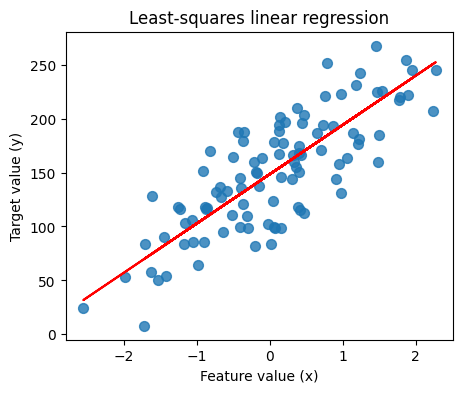

In [15]:
plt.figure(figsize=(5,4))
plt.scatter(X_R1, y_R1, marker='o', s=50, alpha=0.8)
# r- is accounted for red and solid dash for the line
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, 'r-')
plt.title("Least-squares linear regression")
plt.xlabel('Feature value (x)')
plt.ylabel("Target value (y)")
plt.show()

## c. Ridge Regression:

In [16]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state=0)
linridge = Ridge(alpha=20.0).fit(X_train, y_train)
print("Crime dataset")
print("Ridge regression linear model coef: \n{}".format(linridge.coef_))
print("Ridge regression linear mode intercept: {}".format(linridge.intercept_))
print("R-squared score (training): {:.3f}".format(linridge.score(X_train, y_train)))
print("R-squared score (test): {:.3f}".format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ !=0)))

Crime dataset
Ridge regression linear model coef: 
[ 1.95091438e-03  2.19322667e+01  9.56286607e+00 -3.59178973e+01
  6.36465325e+00 -1.96885471e+01 -2.80715856e-03  1.66254486e+00
 -6.61426604e-03 -6.95450680e+00  1.71944731e+01 -5.62819154e+00
  8.83525114e+00  6.79085746e-01 -7.33614221e+00  6.70389803e-03
  9.78505502e-04  5.01202169e-03 -4.89870524e+00 -1.79270062e+01
  9.17572382e+00 -1.24454193e+00  1.21845360e+00  1.03233089e+01
 -3.78037278e+00 -3.73428973e+00  4.74595305e+00  8.42696855e+00
  3.09250005e+01  1.18644167e+01 -2.05183675e+00 -3.82210450e+01
  1.85081589e+01  1.52510829e+00 -2.20086608e+01  2.46283912e+00
  3.29328703e-01  4.02228467e+00 -1.12903533e+01 -4.69567413e-03
  4.27046505e+01 -1.22507167e-03  1.40795790e+00  9.35041855e-01
 -3.00464253e+00  1.12390514e+00 -1.82487653e+01 -1.54653407e+01
  2.41917002e+01 -1.32497562e+01 -4.20113118e-01 -3.59710660e+01
  1.29786751e+01 -2.80765995e+01  4.38513476e+01  3.86590044e+01
 -6.46024046e+01 -1.63714023e+01  2.903

## d. MinMax Scaler:

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)
clf = Ridge().fit(X_scaled_train, y_train)
r2_score = clf.score(X_scaled_test, y_test)
r2_score

0.560270080481406

In [18]:
linridge = Ridge(alpha=20.0).fit(X_scaled_train, y_train)
print('Crime dataset after applying MinMax scaler')
print('Ridge Regression linear model intercept: {}'.format(linridge.intercept_))
print('Ridge Regression linear model coef: \n{}'.format(linridge.coef_))
print('R-squared score (training) : {:.3f}'.format(linridge.score(X_scaled_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linridge.score(X_scaled_test, y_test)))
print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))

Crime dataset after applying MinMax scaler
Ridge Regression linear model intercept: 933.3906385044127
Ridge Regression linear model coef: 
[  88.68827454   16.48947987  -50.30285445  -82.90507574  -65.89507244
   -2.27674244   87.74108514  150.94862182   18.8802613   -31.05554992
  -43.13536109 -189.44266328   -4.52658099  107.97866804  -76.53358414
    2.86032762   34.95230077   90.13523036   52.46428263  -62.10898424
  115.01780357    2.66942023    6.94331369   -5.66646499 -101.55269144
  -36.9087526    -8.7053343    29.11999068  171.25963057   99.36919476
   75.06611841  123.63522539   95.24316483 -330.61044265 -442.30179004
 -284.49744001 -258.37150609   17.66431072 -101.70717151  110.64762887
  523.13611718   24.8208959     4.86533322  -30.46775619   -3.51753937
   50.57947231   10.84840601   18.27680946   44.11189865   58.33588176
   67.08698975  -57.93524659  116.1446052    53.81163718   49.01607711
   -7.62262031   55.14288543  -52.08878272  123.39291017   77.12562171
   45.497

### Ridge regression with regularization parameter: alpha

In [19]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_scaled_train, y_train)
    r2_train = linridge.score(X_scaled_train, y_train)
    r2_test = linridge.score(X_scaled_test, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 88, r-squared training: 0.67, r-squared test: 0.50

Alpha = 1.00
num abs(coeff) > 1.0: 87, r-squared training: 0.66, r-squared test: 0.56

Alpha = 10.00
num abs(coeff) > 1.0: 87, r-squared training: 0.63, r-squared test: 0.59

Alpha = 20.00
num abs(coeff) > 1.0: 88, r-squared training: 0.61, r-squared test: 0.60

Alpha = 50.00
num abs(coeff) > 1.0: 86, r-squared training: 0.58, r-squared test: 0.58

Alpha = 100.00
num abs(coeff) > 1.0: 87, r-squared training: 0.55, r-squared test: 0.55

Alpha = 1000.00
num abs(coeff) > 1.0: 84, r-squared training: 0.31, r-squared test: 0.30



/opt/anaconda3/envs/dataenv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.61791e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


## e. Lasso Regression:

In [20]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state=0)
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)
lassolin = Lasso(alpha=2.0, max_iter=1000).fit(X_scaled_train, y_train)
print("Crime dataset")
print("Lasso regression linear model intercept: {}".format(lassolin.intercept_))
print("Lasso regression linear model coeff: \n{}".format(lassolin.coef_))
print("Non-zero features: {}".format(np.sum(lassolin.coef_ != 0)))
print("R-squared score (training): {:.3f}".format(lassolin.score(X_scaled_train, y_train)))
print("R-squared score (test): {:.3f}\n".format(lassolin.score(X_scaled_test, y_test)))
print("Features with non-zero weight (sorted by absolute magnitude):")
for e in sorted(list(zip(list(X_crime), lassolin.coef_)), key=lambda e: -abs(e[1])):
  if e[1] != 0:
    print('\t{}, {:.3f}'.format(e[0], e[1]))

Crime dataset
Lasso regression linear model intercept: 1186.612061998579
Lasso regression linear model coeff: 
[    0.             0.            -0.          -168.18346054
    -0.            -0.             0.           119.6938194
     0.            -0.             0.          -169.67564456
    -0.             0.            -0.             0.
     0.             0.            -0.            -0.
     0.            -0.             0.             0.
   -57.52991966    -0.            -0.             0.
   259.32889226    -0.             0.             0.
     0.            -0.         -1188.7396867     -0.
    -0.            -0.          -231.42347299     0.
  1488.36512229     0.            -0.            -0.
    -0.             0.             0.             0.
     0.             0.            -0.             0.
    20.14419415     0.             0.             0.
     0.             0.           339.04468804     0.
     0.           459.53799903    -0.             0.
   122.69221826   

## f. Polynomial features with linear regression:

In [21]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1, random_state=0)
linreg = LinearRegression().fit(X_train, y_train)
print('Linear model coeff (w): {}'.format(linreg.coef_))
print('Linear model intercept (b): {:.3f}'.format(linreg.intercept_))
print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))

# Now we transform the original input data to add
# polynomial features up to degree 2 (quadratic)
print('\nNow we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic)\n')
poly = PolynomialFeatures(degree=2) 
X_poly_F1= poly.fit_transform(X_F1)
X_train, X_test, y_train, y_test = train_test_split(X_poly_F1, y_F1, random_state=0)
linreg = LinearRegression().fit(X_train, y_train)
print('(poly deg 2) linear model coeff (w): \n{}'.format(linreg.coef_))
print('(poly deg 2) linear model intercept (w): \n{:.3f}'.format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))

# Addition of many polynomial features often leads to
# overfitting, so we often use polynomial features in combination
# with regression that has a regularization penalty, like ridge
# regression
print('\nAddition of many polynomial features often leads to\n\
overfitting, so we often use polynomial features in combination\n\
with regression that has a regularization penalty, like ridge\n\
regression.\n')
X_train, X_test, y_train, y_test = train_test_split(X_poly_F1, y_F1, random_state=0)
ridlin = Ridge().fit(X_train, y_train)
print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(ridlin.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {:.3f}'
     .format(ridlin.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(ridlin.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(ridlin.score(X_test, y_test)))

Linear model coeff (w): [ 4.42036739  5.99661447  0.52894712 10.23751345  6.5507973  -2.02082636
 -0.32378811]
Linear model intercept (b): 1.543
R-squared score (training): 0.722
R-squared score (test): 0.722

Now we transform the original input data to add
polynomial features up to degree 2 (quadratic)

(poly deg 2) linear model coeff (w): 
[ 3.40951018e-12  1.66452443e+01  2.67285381e+01 -2.21348316e+01
  1.24359227e+01  6.93086826e+00  1.04772675e+00  3.71352773e+00
 -1.33785505e+01 -5.73177185e+00  1.61813184e+00  3.66399592e+00
  5.04513181e+00 -1.45835979e+00  1.95156872e+00 -1.51297378e+01
  4.86762224e+00 -2.97084269e+00 -7.78370522e+00  5.14696078e+00
 -4.65479361e+00  1.84147395e+01 -2.22040650e+00  2.16572630e+00
 -1.27989481e+00  1.87946559e+00  1.52962716e-01  5.62073813e-01
 -8.91697516e-01 -2.18481128e+00  1.37595426e+00 -4.90336041e+00
 -2.23535458e+00  1.38268439e+00 -5.51908208e-01 -1.08795007e+00]
(poly deg 2) linear model intercept (w): 
-3.206
(poly deg 2) R-square

## g. Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import (plot_class_regions_for_classifier_subplot)

fruits = pd.read_table('./datasets/Fruit data with colors.txt')
features_name_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[features_name_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'madarin', 'orange', 'lemon']
X_fruits_2d = fruits[[ 'height', 'width' ]]
y_fruits_2d = fruits['fruit_label']

## Logistic regression for binary classification on fruits dataset using height, width features (positive class: apple, negative class: others)

A fruit with height 6 and width 8 is predicted to be: an apple
A fruit with height 10 and width 7 is predicted to be: not an apple
Accuracy of Logistic regression classifier on training set: 0.80
Accuracy of Logistic regression classifier on test set: 0.73


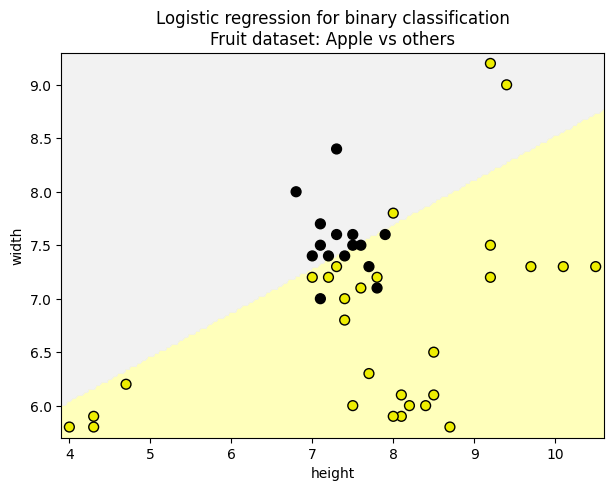

In [23]:
fig, subaxes = plt.subplots(1, 1, figsize=(7,5))
y_fruits_apple = y_fruits_2d == 1
X_train, X_test, y_train, y_test = (train_test_split(X_fruits_2d.values, y_fruits_apple.values, random_state=0))

clf = LogisticRegression(C=100).fit(X_train, y_train)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, 'Logistic regression \
for binary classification\nFruit dataset: Apple vs others',
                                         subaxes )
h = 6
w = 8
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][int(clf.predict([[h,w]])[0])]))

h = 10
w = 7
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][int(clf.predict([[h,w]])[0])]))
subaxes.set_xlabel('height')
subaxes.set_ylabel('width')

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.81
Accuracy of Logistic regression classifier on test set: 0.84


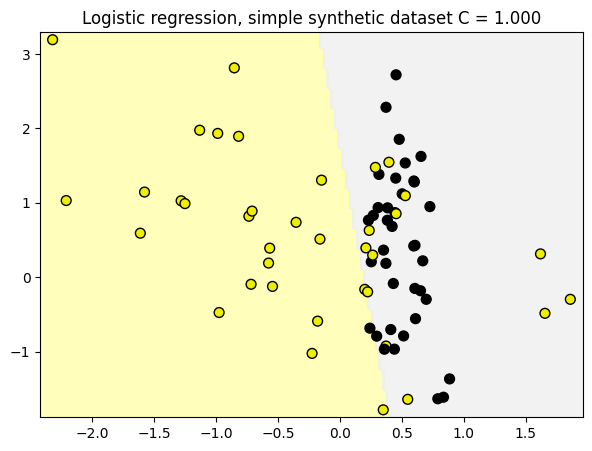

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)
fig, subaxes = plt.subplots(1, 1, figsize=(7,5))
clf = LogisticRegression().fit(X_train, y_train)
title = 'Logistic regression, simple synthetic dataset C = {:.3f}'.format(1,0)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subaxes)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

## Logistic regression regularization: C parameter

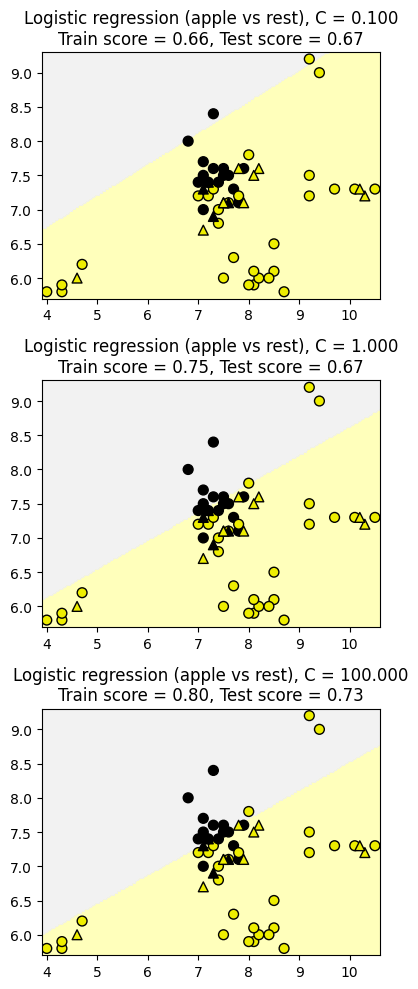

In [25]:
X_train, X_test, y_train, y_test = (
train_test_split(X_fruits_2d.values,
                y_fruits_apple.values,
                random_state=0))

fig, subaxes = plt.subplots(3, 1, figsize=(4, 10))

for this_C, subplot in zip([0.1, 1, 100], subaxes):
    clf = LogisticRegression(C=this_C).fit(X_train, y_train)
    title ='Logistic regression (apple vs rest), C = {:.3f}'.format(this_C)
    
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             X_test, y_test, title,
                                             subplot)
plt.tight_layout()

### Application to real dataset:

In [26]:
import warnings
warnings.filterwarnings('ignore')
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)
clf = LogisticRegression().fit(X_train, y_train)
print("Breast cancer dataset")
print("Accuracy of Logistic regression classifier on training set: {:.2f}".format(clf.score(X_train, y_train)))
print("Accuracy of Logistic regression classifier on test set: {:.2f}".format(clf.score(X_test, y_test))) 

Breast cancer dataset
Accuracy of Logistic regression classifier on training set: 0.95
Accuracy of Logistic regression classifier on test set: 0.94


## Support Vector Machines

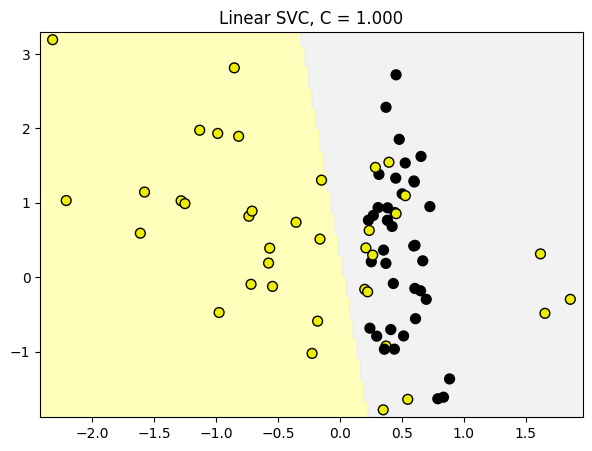

In [27]:
from sklearn.svm import SVC
from adspy_shared_utilities import (plot_class_regions_for_classifier_subplot)

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)

fig, subaxes = plt.subplots(1, 1, figsize=(7,5))
this_C = 1.0
clf = SVC(kernel='linear', C=this_C).fit(X_train, y_train)
title = 'Linear SVC, C = {:.3f}'.format(this_C)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subaxes)

### Compare C paramter:

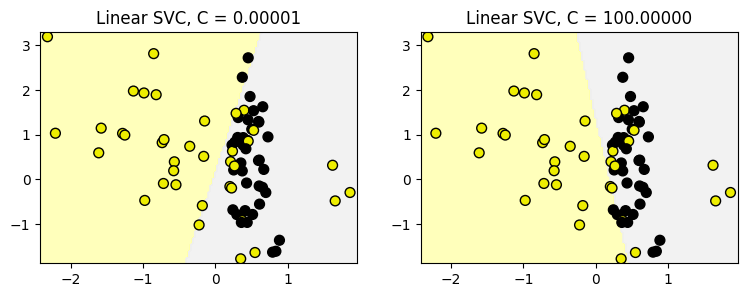

In [28]:
from sklearn.svm import LinearSVC
from adspy_shared_utilities import ( plot_class_regions_for_classifier_subplot )

fig, subaxes = plt.subplots(1, 2, figsize=(9,3))
for this_C, subplot in zip([0.00001, 100], subaxes):
  clf = LinearSVC(C=this_C).fit(X_train, y_train)
  title = 'Linear SVC, C = {:.5f}'.format(this_C)
  plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subplot)

### Application to real dataset:

In [29]:
from sklearn.svm import LinearSVC
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = LinearSVC().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of Linear SVC classifier on training set: 0.97
Accuracy of Linear SVC classifier on test set: 0.97


## Kernelized Support Vector Machines 

### Classification:


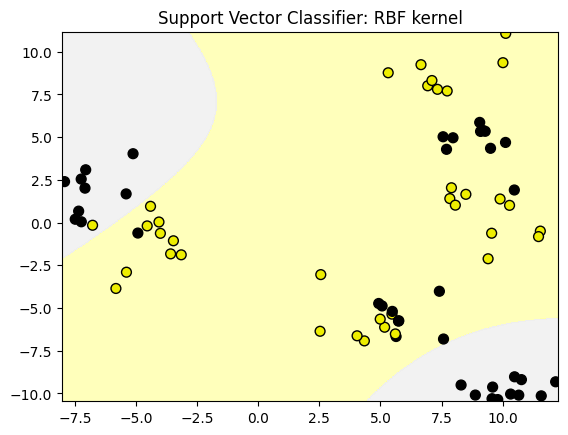

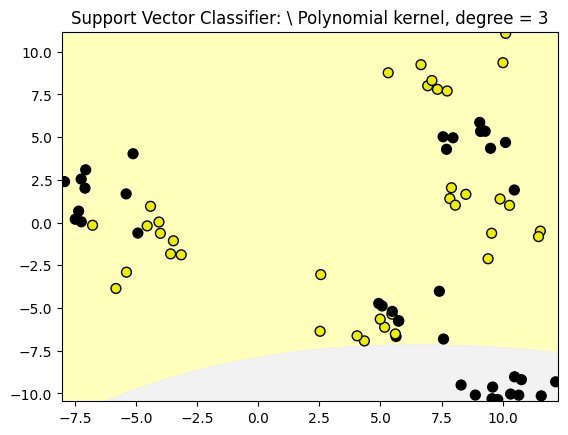

In [30]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

plot_class_regions_for_classifier(SVC().fit(X_train, y_train), X_train, y_train, None, None, 'Support Vector Classifier: RBF kernel')

plot_class_regions_for_classifier(SVC(kernel = 'poly', degree=3).fit(X_train, y_train), X_train, y_train, None, None, 'Support Vector Classifier: \ Polynomial kernel, degree = 3')


## Cross-validation
### Example bases on k-NN classifier with fruit dataset (2 features)

In [31]:
from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier(n_neighbors = 5)
X = X_fruits_2d
y = y_fruits_2d
cv_scores = cross_val_score(clf, X, y, cv=5) # by default 5 fold

print('Cross-validation scores (5-fold): ', cv_scores)
print('Mean cross-validateion score (5-fold): {:.3f}'.format(np.mean(cv_scores)))


Cross-validation scores (5-fold):  [0.75       0.75       0.83333333 0.83333333 0.81818182]
Mean cross-validateion score (5-fold): 0.797


In [32]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

# e^ln(10^-3) = 0.001
param_range = np.logspace(-3, 3, 4) # [0.001, 0.1, 10, 1000]
# high gamma overfit, low gamma underfit
train_scores, test_scores = validation_curve(SVC(), X, y, param_name='gamma', param_range=param_range, cv=5)

print("Train scores: \n", train_scores)
print("Test scores:\n", test_scores)


Train scores: 
 [[0.46808511 0.40425532 0.40425532 0.34042553 0.33333333]
 [0.82978723 0.78723404 0.76595745 0.74468085 0.75      ]
 [0.87234043 0.89361702 0.89361702 0.89361702 0.85416667]
 [0.9787234  1.         0.9787234  1.         0.97916667]]
Test scores:
 [[0.58333333 0.33333333 0.33333333 0.25       0.27272727]
 [0.83333333 0.66666667 0.66666667 0.75       0.72727273]
 [0.41666667 0.66666667 0.83333333 0.83333333 0.81818182]
 [0.33333333 0.33333333 0.25       0.33333333 0.36363636]]


In [33]:
train_scores = np.array([
    [0.46808511, 0.40425532, 0.40425532, 0.34042553, 0.33333333],
    [0.82978723, 0.78723404, 0.76595745, 0.74468085, 0.75      ],
    [0.87234043, 0.89361702, 0.89361702, 0.89361702, 0.85416667],
    [0.9787234 , 1.         , 0.9787234 , 1.         , 0.97916667]
])

test_scores = np.array([
    [0.58333333, 0.33333333, 0.33333333, 0.25      , 0.27272727],
    [0.83333333, 0.66666667, 0.66666667, 0.75      , 0.72727273],
    [0.41666667, 0.66666667, 0.83333333, 0.83333333, 0.81818182],
    [0.33333333, 0.33333333, 0.25      , 0.33333333, 0.36363636]
])


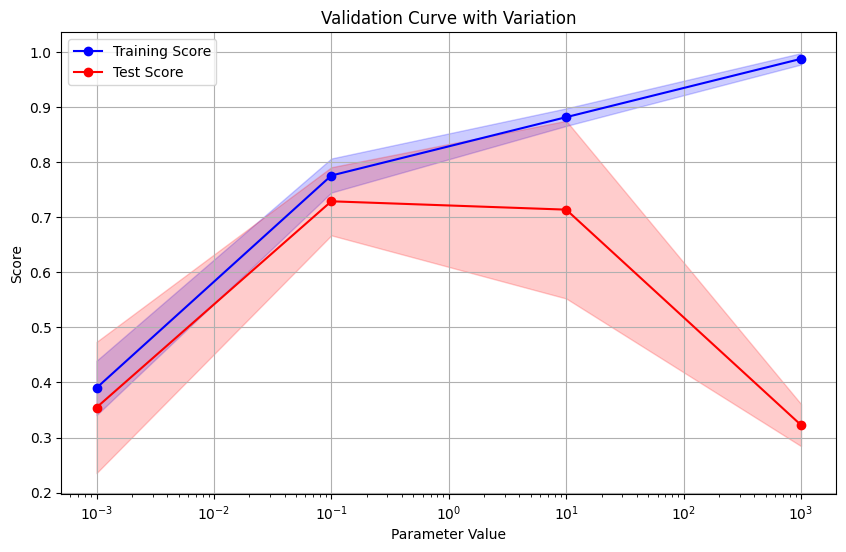

In [34]:
# Compute mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))

# Plot training scores with standard deviation
plt.plot(param_range, train_mean, label='Training Score', color='blue', marker='o')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)

# Plot test scores with standard deviation
plt.plot(param_range, test_mean, label='Test Score', color='red', marker='o')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)

# Add labels and title
plt.xlabel('Parameter Value')
plt.ylabel('Score')
plt.title('Validation Curve with Variation')
plt.xscale('log')  # Typically, parameter ranges are plotted on a logarithmic scale
plt.legend(loc='best')

# Show plot
plt.grid(True)
plt.show()

## Decision Trees

In [35]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=3)
clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))


Accuracy of Decision Tree Classifier on training set: 1.00
Accuracy of Decision Tree Classifier on test set: 0.97


In [36]:
clf2 = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)

print('Accuracy of Decision Tree Classifier on training set: {:.2f}'.format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree Classifier on test set: {:.2f}'.format(clf2.score(X_test, y_test)))

Accuracy of Decision Tree Classifier on training set: 0.98
Accuracy of Decision Tree Classifier on test set: 0.97


## Visualizing decisions trees

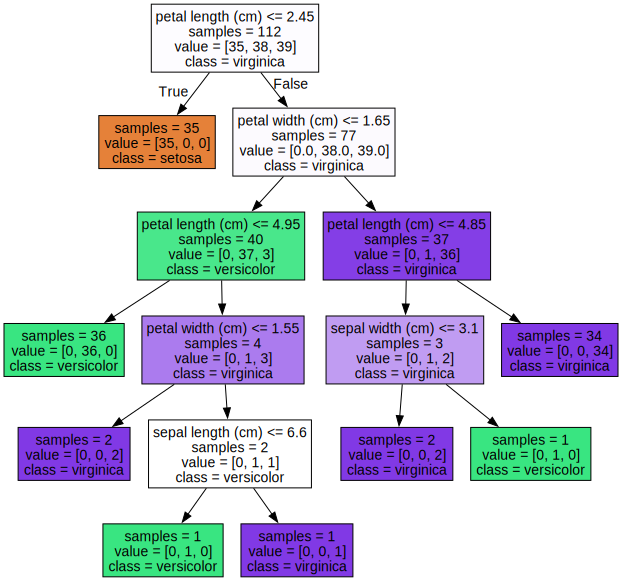

In [37]:
plot_decision_tree(clf, iris.feature_names, iris.target_names)

## Feature Important

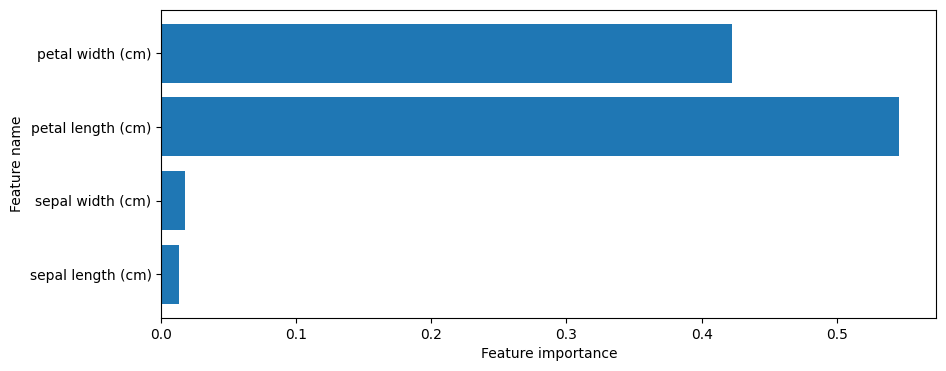

Feature importances: [0.01340675 0.01787567 0.54643762 0.42227996]


In [38]:
from adspy_shared_utilities import plot_feature_importances

plt.figure(figsize=(10, 4))
plot_feature_importances(clf, iris.feature_names)
plt.show()
print('Feature importances: {}'.format(clf.feature_importances_))

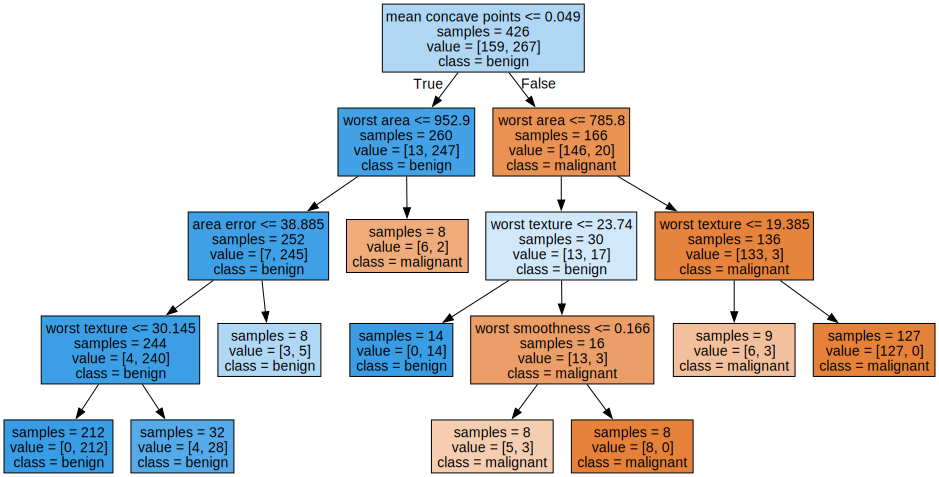

In [39]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from adspy_shared_utilities import plot_feature_importances

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)

clf = DecisionTreeClassifier(max_depth=4, min_samples_leaf=8, random_state=0).fit(X_train, y_train)

plot_decision_tree(clf, cancer.feature_names, cancer.target_names)